In [1]:
import pandas as pd
import nltk # national language tool kit
from konlpy.corpus import kolaw
from konlpy.tag import Okt
import matplotlib.pyplot as plt
from wordcloud import WordCloud

t = Okt()

In [2]:
top500 = pd.read_csv("../Data/melon_top500.csv")
top500.head()

,가수명,노래제목,발매일,가사,좋아요수,순위
0,WSG워너비 (가야G),그때 그 순간 그대로 (그그그),2022-07-09,잘 지냈지? 조금은 어색해 요즘 좋아 보여 인사 나누며 사실 궁금한 게 너무 많았는...,79774,1
1,경서,나의 X에게,2022-04-24,우리 다시 만날래 예쁘게 빛나던 모든 추억들이 너무 그리워 너의 품에 안길래 이 밤...,101199,2
2,멜로망스,사랑인가 봐,2022-02-18,너와 함께 하고 싶은 일들을 상상하는 게 요즘 내 일상이 되고 너의 즐거워하는 모습...,146814,3
3,주호,내가 아니라도,2022-03-25,사랑이었다 별거 없던 내 하루에 빛이 돼준 단한 사람 나보다 나를 더 아껴 주던 너...,50533,4
4,임영웅,사랑은 늘 도망가,2021-10-11,눈물이 난다 이 길을 걸으면 그 사람 손길이 자꾸 생각이 난다 붙잡지 못하고 가슴만...,169216,5


---
top 100 WordCloud

In [3]:
top100 = top500.iloc[:100,:]
top100.head()

,가수명,노래제목,발매일,가사,좋아요수,순위
0,WSG워너비 (가야G),그때 그 순간 그대로 (그그그),2022-07-09,잘 지냈지? 조금은 어색해 요즘 좋아 보여 인사 나누며 사실 궁금한 게 너무 많았는...,79774,1
1,경서,나의 X에게,2022-04-24,우리 다시 만날래 예쁘게 빛나던 모든 추억들이 너무 그리워 너의 품에 안길래 이 밤...,101199,2
2,멜로망스,사랑인가 봐,2022-02-18,너와 함께 하고 싶은 일들을 상상하는 게 요즘 내 일상이 되고 너의 즐거워하는 모습...,146814,3
3,주호,내가 아니라도,2022-03-25,사랑이었다 별거 없던 내 하루에 빛이 돼준 단한 사람 나보다 나를 더 아껴 주던 너...,50533,4
4,임영웅,사랑은 늘 도망가,2021-10-11,눈물이 난다 이 길을 걸으면 그 사람 손길이 자꾸 생각이 난다 붙잡지 못하고 가슴만...,169216,5


In [4]:
# 명사 분리
token_ko = t.nouns(top100.loc[0,'가사'])

In [80]:
# 불용어 추가
# 실행해보면서 추가하면서 바꿔야함.
stop_words = ["거","날",'도',"걸","알"]
token_ko = [each_word for each_word in token_ko if each_word not in stop_words]
# print(token_ko)

In [81]:
# 상위 50개 단어 확인
# 이걸보면서 불용어 지우는게 편해 전체는 힘들어
ko = nltk.Text(token_ko)
ko.vocab().most_common(50)

[('사랑', 9),
 ('우리', 7),
 ('다시', 7),
 ('그때', 6),
 ('기적', 6),
 ('그', 5),
 ('너', 4),
 ('순간', 4),
 ('그대로', 4),
 ('기다림', 3),
 ('끝', 3),
 ('우린', 3),
 ('운명', 3),
 ('서로', 3),
 ('눈앞', 3),
 ('노래', 2),
 ('조금', 1),
 ('요즘', 1),
 ('인사', 1),
 ('사실', 1),
 ('게', 1),
 ('움', 1),
 ('생각', 1),
 ('것', 1),
 ('수다', 1),
 ('뭐', 1),
 ('말', 1),
 ('밤', 1),
 ('새우', 1),
 ('곤', 1),
 ('목소리', 1),
 ('얼굴', 1),
 ('한마디', 1),
 ('눈물', 1),
 ('나', 1),
 ('거리', 1),
 ('이제', 1),
 ('혼자', 1),
 ('둘', 1),
 ('오른쪽', 1),
 ('발', 1),
 ('만남', 1),
 ('더욱', 1),
 ('더', 1),
 ('마음', 1),
 ('처음', 1),
 ('느낌', 1)]

In [82]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [83]:
# Warning무시
import warnings
warnings.filterwarnings('ignore')

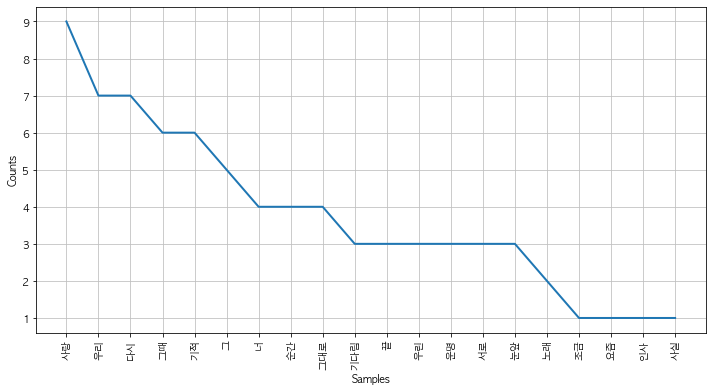

In [84]:
# 상위 50개의 빈도수 차트 만들기
plt.figure(figsize=(12,6))
ko.plot(20)
plt.show()

In [85]:
# 상위 500개만 wordcloud로 그리기
# 구한데이터로 그리기
data = ko.vocab().most_common(500)

# 딕셔너리로 만들기
tmp_data = dict(data)

wordcloud = WordCloud(
    background_color='White',
    relative_scaling=0.8,
    font_path="AppleGothic" # 윈도우 => 'c:/Windows/Fonts/malgun.ttf'
).generate_from_frequencies(tmp_data)

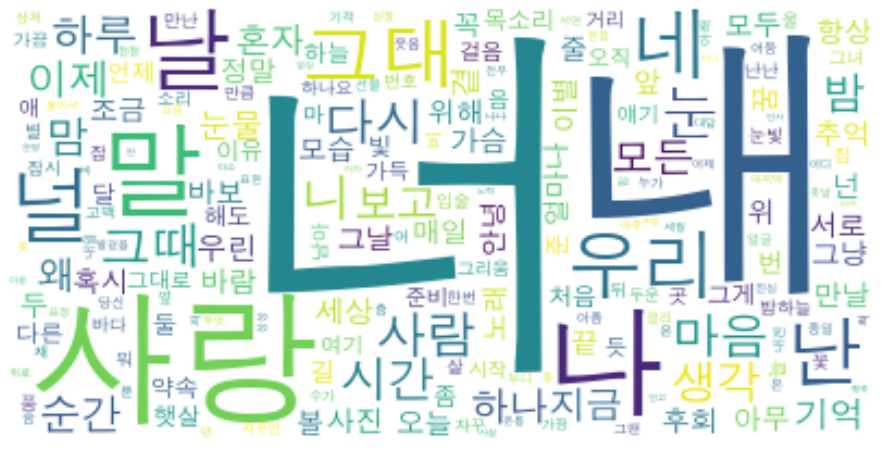

In [75]:
plt.figure(figsize=(16,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [14]:
top100["가사"] = top100["가사"].astype("string")
top100.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   가수명     100 non-null    object
 1   노래제목    100 non-null    object
 2   발매일     100 non-null    object
 3   가사      100 non-null    string
 4   좋아요수    100 non-null    int64 
 5   순위      100 non-null    int64 
dtypes: int64(2), object(3), string(1)
memory usage: 4.8+ KB


---
top100 가사 합치기

In [16]:
top100['가사'][0] + top100['가사'][1]

'잘 지냈지? 조금은 어색해 요즘 좋아 보여 인사 나누며 사실 궁금한 게 너무 많았는데 반가움에 멍해졌죠  생각보다 오래 된 것 같은 우리 수다스럽던 그때가 생각나 뭐가 그렇게도 할 말이 많아서 밤을 지새우곤 했죠  그리운 목소리 그리던 얼굴 참 많이도 기다렸어 다시 만나자는 너의 한마디에 울컥 눈물이 나 결국 너였단 걸  알아 기다림의 끝은 기적이 되고 기적 같은 우린 운명처럼  서로를 알아보고 그렇게 눈앞에 서있죠  우리 사랑했던 우리 다시 만나 그때 그 순간 그대로 사랑했고 사랑할 거니까  같이 듣던 노래 그때 그 거리를 이제 혼자 아닌 너와 둘이 걸어 다시 오른쪽에 나란히 발맞춰 같은 노래를 부르죠  그리운 만남을 그리던 날들 참 많이도 기다렸어 다시 너를 만나 더욱 더 소중해 같은 마음이란 걸 알아 기다림의 끝은 기적이 되고 기적 같은 우린 운명처럼  서로를 알아보고 그렇게 눈앞에 서있죠 우리 사랑했던 우리 다시 만나 그때 그 순간 그대로 사랑했고 사랑할 거니까 처음 느낌 그대로 설렘이 가득한 날 고마워 다시 돌아와줘서 그때 그 순간처럼 날 안아줘 결국 기다림의 끝은 기적이 되고 기적 같은 우린 운명처럼  서로를 알아보고 그렇게 눈앞에 서있죠  우리 사랑했던 우리 다시 만나 그때 그 순간 그대로 사랑했고 사랑할 거니까우리 다시 만날래 예쁘게 빛나던 모든 추억들이 너무 그리워 너의 품에 안길래 이 밤이 새도록 네게 말할 거야 너를 좋아한다고 안녕 그대야 요즘 어떻게 지내 가로수길 걷다가 생각이 나서 행복해 보이는 사람들 속에 우리 둘만 없어서 어색했었어 늘 집에 갈 땐 항상 뒤돌아보면 날 보며 웃어주던 네가 생각났어 우리 다시 만날래 예쁘게 빛나던 모든 추억들이 너무 그리워 너의 품에 안길래 이 밤이 새도록 네게 말할 거야 너를 좋아한다고 토요일마다 가던 한강공원에 이어폰 하나씩 나눠끼고서 벚꽃엔딩같이 듣고 있으면 부러울 게 없었어 너만 있으면 널 사랑할 때 내가 너무 그리워 날 보며 웃어주던 네가 보고 싶어 우리 다시 만날래 예쁘게 빛나던 모든 추억들

In [17]:
total = ""

In [18]:
for i in range(0, 100):
    total += (" " + top100['가사'][i])
# print(total) 

In [19]:
# 명사 분리
token_ko = t.nouns(total)

In [23]:
# 불용어 추가
# 실행해보면서 추가하면서 바꿔야함.
stop_words = ["거",'도',"걸","알","것","더","이","그","수","속","게","때","못","해","젠","전","또","안","발","손","일","건","볼"]
token_ko = [each_word for each_word in token_ko if each_word not in stop_words]
# print(token_ko)

In [21]:
# 상위 50개 단어 확인
# 이걸보면서 불용어 지우는게 편해 전체는 힘들어
ko = nltk.Text(token_ko)
ko.vocab().most_common(50)

[('너', 441),
 ('내', 311),
 ('사랑', 280),
 ('나', 218),
 ('말', 185),
 ('날', 155),
 ('널', 140),
 ('네', 127),
 ('난', 124),
 ('그대', 122),
 ('우리', 117),
 ('눈', 81),
 ('사람', 70),
 ('다시', 69),
 ('그때', 68),
 ('니', 67),
 ('마음', 65),
 ('시간', 64),
 ('생각', 59),
 ('하루', 56),
 ('맘', 55),
 ('밤', 54),
 ('순간', 51),
 ('모든', 51),
 ('이제', 50),
 ('보고', 50),
 ('하나', 47),
 ('왜', 47),
 ('지금', 43),
 ('혼자', 41),
 ('기억', 40),
 ('눈물', 36),
 ('곁', 36),
 ('우린', 34),
 ('세상', 34),
 ('모습', 32),
 ('이별', 31),
 ('위해', 31),
 ('오늘', 31),
 ('넌', 30),
 ('추억', 29),
 ('안녕', 28),
 ('꿈', 28),
 ('볼', 28),
 ('매일', 28),
 ('서로', 27),
 ('앞', 27),
 ('끝', 26),
 ('그날', 25),
 ('가슴', 25)]

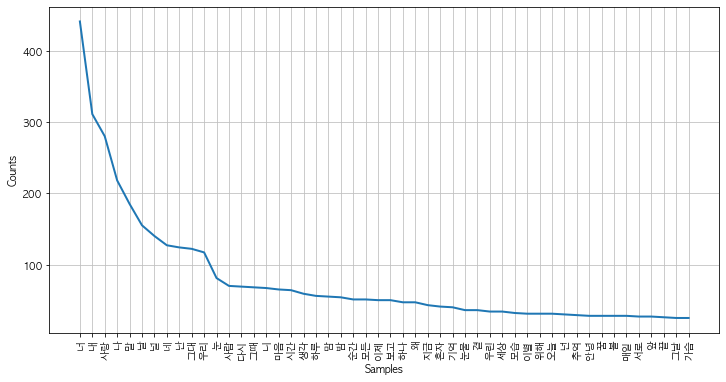

In [22]:
# 상위 50개의 빈도수 차트 만들기
plt.figure(figsize=(12,6))
ko.plot(50)
plt.show()

In [ ]:
# 상위 500개만 wordcloud로 그리기
# 구한데이터로 그리기
data = ko.vocab().most_common(500)

# 딕셔너리로 만들기
tmp_data = dict(data)

wordcloud = WordCloud(
    background_color='White',
    relative_scaling=0.2,
    font_path="AppleGothic" # 윈도우 => 'c:/Windows/Fonts/malgun.ttf'
).generate_from_frequencies(tmp_data)

In [ ]:
plt.figure(figsize=(16,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

---
top 500 가사 wordcloud

In [ ]:
total = ""
for i in range(0, 500):
    total += (" " + top500['가사'][i])
# print(total) 

In [ ]:
# 명사 분리
token_ko = t.nouns(total)

In [ ]:
# 불용어 추가
# 실행해보면서 추가하면서 바꿔야함.
stop_words = ["거",'도',"걸","알","것","더","이","그","수","속","게","때","못","해","젠","전","또","안","발","손","일","건"]
token_ko = [each_word for each_word in token_ko if each_word not in stop_words]
# print(token_ko)

In [ ]:
# 상위 50개 단어 확인
# 이걸보면서 불용어 지우는게 편해 전체는 힘들어
ko = nltk.Text(token_ko)
ko.vocab().most_common(50)

In [ ]:
# 상위 50개의 빈도수 차트 만들기
plt.figure(figsize=(12,6))
ko.plot(50)
plt.show()

In [ ]:
# 상위 500개만 wordcloud로 그리기
# 구한데이터로 그리기
data = ko.vocab().most_common(500)

# 딕셔너리로 만들기
tmp_data = dict(data)

wordcloud = WordCloud(
    background_color='White',
    relative_scaling=0.2,
    font_path="AppleGothic" # 윈도우 => 'c:/Windows/Fonts/malgun.ttf'
).generate_from_frequencies(tmp_data)

In [ ]:
plt.figure(figsize=(16,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()